In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
#Loading the dataset
df = pd.read_csv("LoanDefaultData.csv")
print(df.info())  # Display dataset information
df.head()  # Show first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cust_id            2999 non-null   int64  
 1   year               2999 non-null   int64  
 2   state              2999 non-null   object 
 3   date_issued        2999 non-null   object 
 4   date_final         2999 non-null   int64  
 5   emp_duration       2999 non-null   float64
 6   own_type           2999 non-null   object 
 7   income_type        2999 non-null   object 
 8   app_type           2999 non-null   object 
 9   loan_purpose       2999 non-null   object 
 10  interest_payments  2999 non-null   object 
 11  grade              2999 non-null   object 
 12  annual_pay         2999 non-null   int64  
 13  loan_amount        2999 non-null   int64  
 14  interest_rate      2999 non-null   float64
 15  loan_duration      2999 non-null   object 
 16  dti                2999 

,cust_id,year,state,date_issued,date_final,emp_duration,own_type,income_type,app_type,loan_purpose,...,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
0,180675,2007,Andhra Pradesh,01/12/07,1032009,10.0,MORTGAGE,Low,INDIVIDUAL,debt_consolidation,...,73000,25000,10.91,36 months,22.13,13650.38,8767.32,2207.65,817.41,1
1,85781,2007,Rajasthan,01/06/07,1072010,0.5,RENT,Low,INDIVIDUAL,other,...,40000,1400,10.91,36 months,8.61,1663.04,1400.00,0.00,45.78,0
2,85675,2007,Manipur,01/06/07,1062010,10.0,RENT,Low,INDIVIDUAL,other,...,25000,1000,14.07,36 months,16.27,1231.38,1000.00,0.00,34.21,0
3,84918,2007,Andhra Pradesh,01/09/07,1042008,10.0,MORTGAGE,Low,INDIVIDUAL,other,...,65000,5000,7.43,36 months,0.28,5200.44,5000.00,0.00,155.38,0
4,84670,2007,Arunachal Pradesh,01/06/07,1082009,10.0,MORTGAGE,High,INDIVIDUAL,other,...,300000,5000,7.75,36 months,5.38,5565.65,5000.00,0.00,156.11,0


In [3]:
#Data Cleaning 
print(df.isnull().sum())

cust_id              0
year                 0
state                0
date_issued          0
date_final           0
emp_duration         0
own_type             0
income_type          0
app_type             0
loan_purpose         0
interest_payments    0
grade                0
annual_pay           0
loan_amount          0
interest_rate        0
loan_duration        0
dti                  0
total_pymnt          0
total_rec_prncp      0
recoveries           0
installment          0
is_default           0
dtype: int64


In [12]:
#df.fillna(df.median(), inplace=True)    No missing values


In [24]:
print(df.columns)

Index(['year', 'state', 'emp_duration', 'own_type', 'income_type', 'app_type',
       'loan_purpose', 'interest_payments', 'grade', 'annual_pay',
       'loan_amount', 'interest_rate', 'loan_duration', 'dti', 'total_pymnt',
       'total_rec_prncp', 'recoveries', 'installment', 'is_default'],
      dtype='object')


In [25]:
df = df.copy()  

# Define categorical columns (Ensure all are present)
categorical_columns = ["state", "own_type", "income_type", "app_type", 
                       "loan_purpose", "interest_payments", "grade", "loan_duration"]

# Encoding categorical variables if they exist
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in categorical_columns:
    if col in df.columns:  
        df[col] = le.fit_transform(df[col])

X = df.drop(columns=["is_default"])  # Predicting `is_default`
y = df["is_default"]


In [26]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [27]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.9833333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       478
           1       1.00      0.92      0.96       122

    accuracy                           0.98       600
   macro avg       0.99      0.96      0.97       600
weighted avg       0.98      0.98      0.98       600



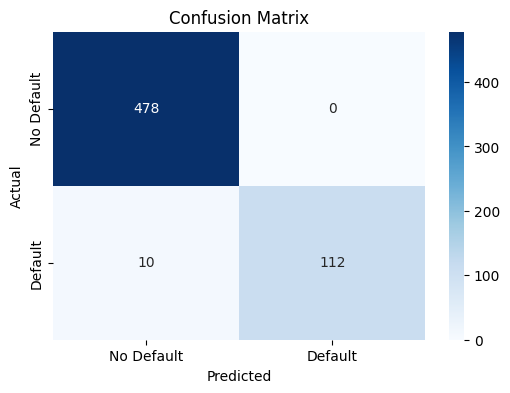

In [28]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", 
            xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [29]:
random_index = np.random.randint(0, X_test.shape[0])
random_data = X_test[random_index].reshape(1, -1)

prediction = model.predict(random_data)[0]
prediction_text = "Will Default" if prediction == 1 else "✅ Will Not Default"

random_original_data = pd.DataFrame([X.iloc[random_index]], columns=X.columns)

print("\n **Predicted Loan Default Status:**", prediction_text)
print("\n **Loan Details of Selected Customer:**\n", random_original_data)



📌 **Predicted Loan Default Status:** ✅ Will Not Default

🔎 **Loan Details of Selected Customer:**
        year  state  emp_duration  own_type  income_type  app_type  \
256  2007.0   17.0           5.0       4.0          1.0       0.0   

     loan_purpose  interest_payments  grade  annual_pay  loan_amount  \
256           2.0                0.0    4.0     65000.0       5700.0   

     interest_rate  loan_duration    dti  total_pymnt  total_rec_prncp  \
256          13.43            0.0  18.22      6955.99           5700.0   

     recoveries  installment  
256         0.0       193.26  


C:\Users\Soham\AppData\Local\Temp\ipykernel_21688\101285110.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["is_default"], palette="coolwarm")


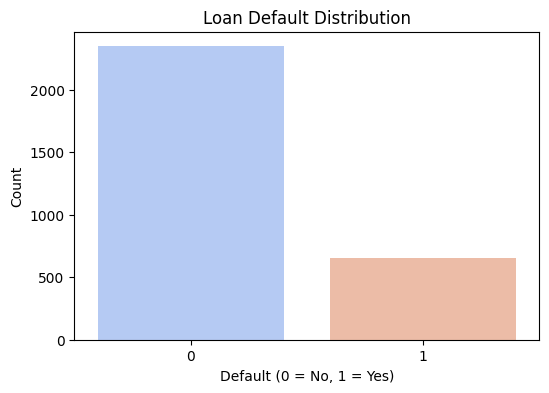

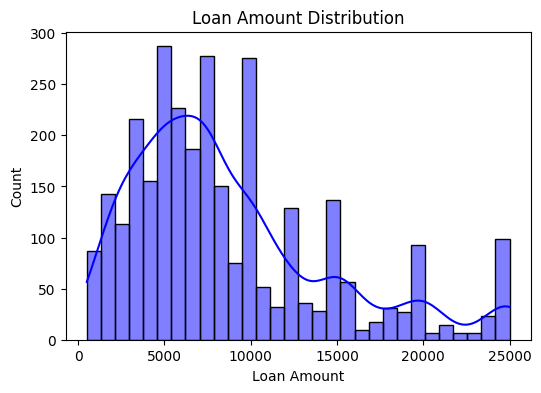

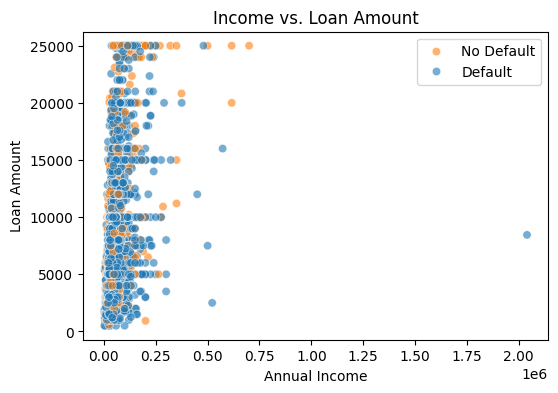

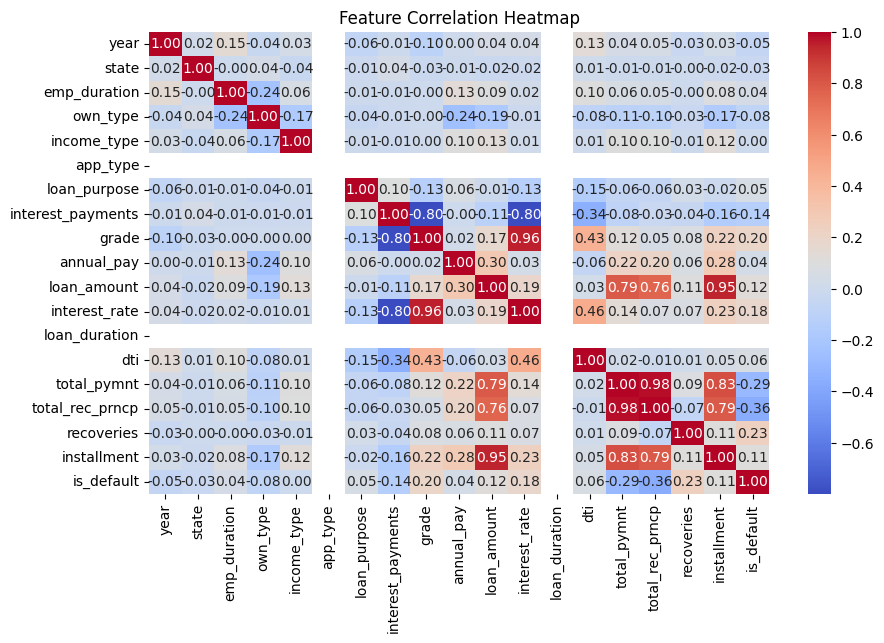

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

#Loan Default Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["is_default"], palette="coolwarm")
plt.title("Loan Default Distribution")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Loan Amount Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df["loan_amount"], bins=30, kde=True, color='blue')
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.show()

# Income vs. Loan Amount Scatter Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["annual_pay"], y=df["loan_amount"], hue=df["is_default"], alpha=0.6)
plt.title("Income vs. Loan Amount")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.legend(["No Default", "Default"])
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
